In [2]:
import os
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import matplotlib.pyplot as plt
import numpy as np

import sys
# sys.path.append(os.path.join("..", "..", "dependencies"))
import pyemu

In [4]:
# the pest folder
f_d = os.path.join('handling_files')

In [5]:
pst = pyemu.Pst(os.path.join(f_d,"freyberg_pp.pst"))

## Then, play ...

In [26]:
# * control data
                 # pst.control_data.noptmax = 0        # pst.control_data.formatted_values       # edit / visualize 
# * singular value decomposition            
# pst.parameter_data.tail()         # ______________ 
# pst.parameter_groups.head()       # ______________ 
# * observation groups head() 
# pst.observation_data.head()       # ______________ 
# * model command line
pst.prior_information.head()      # ______________ 
# * regularization                                                           # https://help.pesthomepage.org/pestpp-ies.html
# ++ options 
     # pst.pestpp_options['ies_parameter_ensemble'] = 'dummy_ies_par_ensemble.csv'    # the flagship of the PEST++ suite (!)
     # pst.pestpp_options['ies_num_reals'] = 50                                       # number of realizations
     # pst.pestpp_options["lambdas"] = [0.1, 1, 10, 100, 1000]                        # calculation of parameter upgrades
     # pst.pestpp_options['da_use_simulated_states'] = True                           # end of each cycle to the next 
# pst.pestpp_options

,pilbl,equation,weight,obgnme,extra
pilbl,,,,,
rch_0,rch_0,1.0 * log(rch_0) = 0.000000E+00,1.660964,regulrch,NaN
rch_1,rch_1,1.0 * log(rch_1) = 0.000000E+00,0.926628,regulrch,NaN
w0_r09_c16,w0_r09_c16,1.0 * log(w0_r09_c16) = 0.000000E+00,1.660964,regulw0,NaN
w0_r11_c13,w0_r11_c13,1.0 * log(w0_r11_c13) = 0.000000E+00,1.660964,regulw0,NaN
w0_r20_c14,w0_r20_c14,1.0 * log(w0_r20_c14) = 0.000000E+00,1.660964,regulw0,NaN


In [23]:
# pst.parameter_data.columns     # See parval1

In [31]:
pst.parameter_data.iloc[:1,:] 

,parnme,partrans,parchglim,parval1,parlbnd,parubnd,pargp,scale,offset,dercom,extra
parnme,,,,,,,,,,,
hk00,hk00,log,factor,1.1,0.5,50.0,hk,1.0,0.0,1,NaN


In [42]:
#assigning values to all parameter intial values
pst.parameter_data['parval1'] = 99999
pst.parameter_data.tail()         # ______________ 

,parnme,partrans,parchglim,parval1,parlbnd,parubnd,pargp,scale,offset,dercom,extra
parnme,,,,,,,,,,,
w1_r11_c13,w1_r11_c13,log,factor,99999,0.1,10.0,w1,1.0,0.0,1,NaN
w1_r20_c14,w1_r20_c14,log,factor,99999,0.1,10.0,w1,1.0,0.0,1,NaN
w1_r26_c10,w1_r26_c10,log,factor,99999,0.1,10.0,w1,1.0,0.0,1,NaN
w1_r29_c06,w1_r29_c06,log,factor,99999,0.1,10.0,w1,1.0,0.0,1,NaN
w1_r34_c12,w1_r34_c12,log,factor,99999,0.1,10.0,w1,1.0,0.0,1,NaN


In [41]:
# pst.write(os.path.join(f_d, 'temp.pst'), version=1)         # PEST and PEST_HP
pst.write(os.path.join(f_d, "temp_v2.pst"), version=2)        # PEST++
# [f for f in os.listdir(f_d) if f.endswith('.pst')]

noptmax:6, npar_adj:48, nnz_obs:14


In [42]:
tpl_filename = os.path.join(f_d,"special_pars.dat.tpl")           # ... and special_pars.dat
with open(tpl_filename,'w') as f:
    f.write("ptf ~\n")
    f.write("special_par1  ~  special_par1   ~\n")
    f.write("special_par2  ~  special_par2   ~\n")
    # f.write("Beta_01_____  ~  Beta_nono_____   ~\n")

In [43]:
pst.add_parameters(tpl_filename, pst_path=".")                    # to *.pst ? 

2 pars added from template file .\special_pars.dat.tpl


,parnme,partrans,parchglim,parval1,parlbnd,parubnd,pargp,scale,offset,dercom
special_par2,special_par2,log,factor,1.0,1.100000e-10,1.100000e+10,pargp,1.0,0.0,1
special_par1,special_par1,log,factor,1.0,1.100000e-10,1.100000e+10,pargp,1.0,0.0,1


In [44]:
par = pst.parameter_data
par.loc[par['pargp'] == 'pargp', ['parlbnd', 'parubnd']] = 999999999, -30000            # Beta___persists (!)
par.loc[par['pargp'] == 'pargp']

,parnme,partrans,parchglim,parval1,parlbnd,parubnd,pargp,scale,offset,dercom,extra
special_par2,special_par2,log,factor,1.0,999999999.0,-30000.0,pargp,1.0,0.0,1,NaN
special_par1,special_par1,log,factor,1.0,999999999.0,-30000.0,pargp,1.0,0.0,1,NaN


In [45]:
par.loc['special_par2', 'partrans'] = 'tied'                
par.loc['special_par2', 'partied'] = 'special_par1'         # New column named and tied parameter 
par.loc[par['pargp'] == 'pargp', ['partrans', 'partied']]

,partrans,partied
special_par2,tied,special_par1
special_par1,log,NaN


In [46]:
# pst.nnz_obs_groups                 # nnz non-zero         OBS
# pst.nnz_obs, pst.npar_adj          #                      OBS PAR 
# pst.adj_par_groups[:15]            # adjustble                PAR  group names  
# pst.write_par_summary_table()
# pst.write_obs_summary_table()        # *.tex ?

#### Phi and residuals

In [79]:
pst.res.head()         # *.rei

,name,group,measured,modelled,residual,weight
name,,,,,,
c001cr03c10_19700102,c001cr03c10_19700102,calhead,26.661526,28.013775,-1.352249,5.0
c001cr03c16_19700102,c001cr03c16_19700102,calhead,23.460564,24.444290,-0.983726,5.0
c001cr04c09_19700102,c001cr04c09_19700102,calhead,28.513522,28.513071,0.000451,5.0
c001cr10c02_19700102,c001cr10c02_19700102,calhead,30.741689,31.881250,-1.139561,5.0
c001cr14c11_19700102,c001cr14c11_19700102,calhead,25.871208,25.444475,0.426733,5.0


In [86]:
# pst.res.plot.scatter('measured', 'modelled')                # MED x MOD
# pst.res.iloc[:300].loc[:, 'residual'].plot(kind='bar')       # REI

In [95]:
# pst.plot(kind='1to1');       # 1to1 = each observationg group with non-zero weighted observations
# pst.phi                      # weighted sum of square residuals 
# ___________________________
# pst.phi_components 
# pst.plot(kind="phi_pie");
# ___________________________
# obs = pst.observation_data
# obs['weight'] = 1.0                 # change all observation weights
# pst.phi_components 

### Weights _____ `Pst.adjust_weights()` = `PWTADJ1`

- **history-matching**, observation weights assigned to reflect observation uncertainty, and  equal "visibility" ...
- **generating an observation ensemble**, weights should reflect the inverse of the standard deviation of measurement noise ...
- when history-matching with `pestpp-ies` and using weights that **do not** reflect observation uncertainty, it is important to provide `pestpp-ies` with a previously prepared observation ensemble (we will demonstrate this further on).

In [107]:
# pst.phi_components
balanced_groups = {grp:100 for grp in pst.nnz_obs_groups}
# balanced_groups                                                 # take a look supressing ´#´
pst.adjust_weights(obsgrp_dict=balanced_groups,)
# pst.phi_components                                              # see
# pst.plot(kind="phi_pie");

### Discrepancy based weight adjustment ___ `Pst.adjust_weights_discrepancy()` = ` PWTADJ2` ___ u pothead

- Objective function = nº observations. This really matters when we do posterior uncertainty analyses (FOSM) 
- ... after history matching! The point is for weights to represent both measurement error **and** model error.*

In [118]:
pst.phi, pst.nnz_obs            # current phi and nº of non-zero observations   # pst.par_groups (?)

(np.float64(211.53558969631908), 1013)

In [119]:
pst.adjust_weights_discrepancy(original_ceiling=True)       # default _________ #  true  
pst.phi

np.float64(211.53558969631908)

In [25]:
# pst.write_obs_summary_table()      # expecting Phi to be equal to ____ nnz_obs ____ (number of non zero observations)

## Geostatistics = PPCOV

In [8]:
v = pyemu.geostats.ExpVario(contribution=1.0,           # exponential spherical
                                    a=1000, 
                                    anisotropy=1.0, 
                                    bearing=0.0 )

In [9]:
v2 = pyemu.geostats.SphVario(contribution=1.0,          # sill
                                    a=500,              # range of correlation
                                    anisotropy=1.5,     # name says it all
                                    bearing=45.0,       # angle in degrees East of North corresponding to anisotropy ellipse
                                    name='var2')        # optional name

<Axes: xlabel='distance', ylabel='$\\gamma$'>

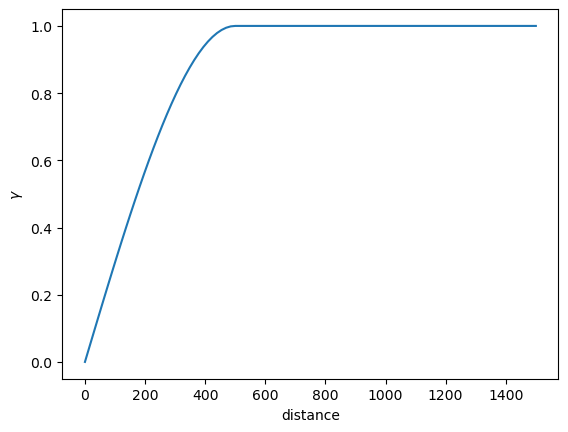

In [10]:
gs = pyemu.geostats.GeoStruct(variograms=[v2], transform='log') 
gs.plot()

In [6]:
df = pyemu.pp_utils.pp_tpl_to_dataframe(os.path.join(f_d,"hkpp.dat.tpl"))
df.head()

,name,x,y,zone,parnme
0,pp_0000,625.0,9375.0,1,hk00
1,pp_0001,1625.0,9375.0,1,hk01
2,pp_0002,2625.0,9375.0,1,hk02
3,pp_0003,3625.0,9375.0,1,hk03
4,pp_0004,625.0,8375.0,1,hk04


In [19]:
cov = gs.covariance_matrix(x=df.x, y=df.y, names=df.parnme)      # gs ______ from the variogram 
# c = plt.imshow(cov.x)
# plt.colorbar(c)                                                # ploting  

We can do the same thing for a 1-D sequence (think time-series), to get a covariance matrix for parameters distributed in time:

In [22]:
times = np.arange(0,365,1)                # "X"                # year 
y = np.ones_like(times)                   # "Y"                # time-series
names = ["t_"+str(t) for t in times]      # 'parameter" names

exp_vario = pyemu.geostats.ExpVario(contribution=1.0,          # variogram
                                    a = 5)                     # range 
# cov_t = exp_vario.covariance_matrix(times,y,names)
# plt.imshow(cov_t.x)

### PAR Prior Preferred Value___  `Zero Order Tikhonov`  ____ ADDREG1 and ADDREG2 ____

In [27]:
pyemu.helpers.zero_order_tikhonov(pst,                            # preferred values
                                par_groups=pst.adj_par_groups,    # PAR groups __________ + prior info
                                reset=True)       # remove existing prior equations first

# Weights from parameter bounds # pyemu.helpers.zero_order_tikhonov()
# pst.prior_information.tail()  # See previous ... 

### PAR Prior Preferred Difference _____ ` First Order Pearson Tikhonov`

In [38]:
# Parameters which are close together should be similar to each other.  ____________________PAR weights (?)
pyemu.helpers.first_order_pearson_tikhonov(pst, 
                                            cov=cov,             # the covariance matrix; PAR 
                                            reset=False,         # prefered value & prefered difference eqs
                                            abs_drop_tol=0.01)   # drop pi eqs that have small weight

getting CC matrix
processing


In [36]:
# note the additional number of prior information equations
pst.prior_information.tail()

,pilbl,equation,obgnme,weight
pilbl,,,,
w1_r11_c13,w1_r11_c13,1.0 * log(w1_r11_c13) = 0.000000E+00,regulw1,0.5
w1_r20_c14,w1_r20_c14,1.0 * log(w1_r20_c14) = 0.000000E+00,regulw1,0.5
w1_r26_c10,w1_r26_c10,1.0 * log(w1_r26_c10) = 0.000000E+00,regulw1,0.5
w1_r29_c06,w1_r29_c06,1.0 * log(w1_r29_c06) = 0.000000E+00,regulw1,0.5
w1_r34_c12,w1_r34_c12,1.0 * log(w1_r34_c12) = 0.000000E+00,regulw1,0.5


### Custom Prior Information Equations

In [48]:
par = pst.parameter_data
par.loc[par['pargp']=='pargp', 'partrans'] = 'log'        # just un-tie
par.loc[par['pargp']=='pargp']

,parnme,partrans,parchglim,parval1,parlbnd,parubnd,pargp,scale,offset,dercom,extra,partied
special_par2,special_par2,log,factor,1.0,999999999.0,-30000.0,pargp,1.0,0.0,1,NaN,special_par1
special_par1,special_par1,log,factor,1.0,999999999.0,-30000.0,pargp,1.0,0.0,1,NaN,NaN


In [59]:
pst.add_pi_equation(par_names=['special_par1', 'special_par2'],            # left hand side of the equation
                    pilbl='new_pi_eq', rhs=0.0,                            # Right hand side ; * revise prior information eq 
                    weight=1.0, 
                    obs_group='regul_special',                             # name of prior information "OBS group"
                    coef_dict = {'special_par1':99.0, 'special_par2':300} ) # parameter coeficients; ... do try changes here
pst.prior_information.iloc[-3:]

,pilbl,equation,obgnme,weight,names
pilbl,,,,,
w1_r29_c06,w1_r29_c06,1.0 * log(w1_r29_c06) = 0.000000E+00,regulw1,0.5,[w1_r29_c06]
w1_r34_c12,w1_r34_c12,1.0 * log(w1_r34_c12) = 0.000000E+00,regulw1,0.5,[w1_r34_c12]
new_pi_eq,new_pi_eq,99.0 * log(special_par1) + 300 * log(special_par2) = 0.0,regul_special,1.0,NaN


## Matrices

In [63]:
parcov = pyemu.Cov.from_parameter_data(pst)   # PAR ___ bounds  ___ covariance matrix
# parcov.row_names[:5], parcov.col_names[:5], 
# parcov.isdiagonal              # Diagonal: - uncertainty of each PAR (bounds). Off_values: - correlation within PAR

True

In [68]:
# cov.isdiagonal
# parcov.x
cov.x

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], shape=(32, 32))

In [69]:
parcov.x.shape, cov.x.shape

((50, 1), (32, 32))

In [70]:
parcov.as_2d

array([[0.25      , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.25      , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.25      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.25      , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.27852701,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.27852701]], shape=(50, 50))

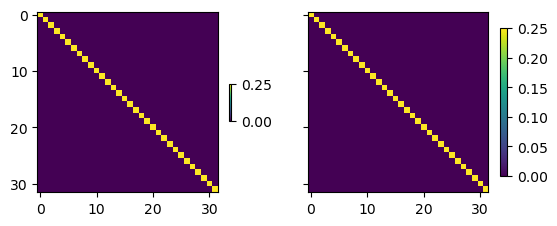

In [77]:
parnames = par.loc[par['pargp']=='hk', 'parnme'].tolist()                # PAR names (2x)
subcov = parcov.get(row_names=parnames, col_names=parnames, drop=False)  # submatrix from cov_pb (?); 
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)      # plot both

c = ax1.imshow(subcov.as_2d)                         # plot submatrix of diagonal matrix
plt.colorbar(c, ax=ax1, shrink=0.1)                  

c = ax2.imshow(0.25 * cov.as_2d)                     # plot cov matrix of correlated parameters 
plt.colorbar(c, ax=ax2, shrink=0.4)                 

In [79]:
cov_singular_values = cov.s     #   SVD   Vector
# cov_singular_values.x

"Right singular vectors" are obtained with `.v` attribute:

In [80]:
cov.v  # ?

In [81]:
covdf = cov.to_dataframe()
covdf.head()                  # Pandas

,hk00,hk01,hk02,hk03,hk04,hk05,hk06,hk07,hk08,hk09,...,hk22,hk23,hk24,hk25,hk26,hk27,hk28,hk29,hk30,hk31
hk00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hk01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hk02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hk03,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hk04,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
# cov.to_ascii(filename=os.path.join(f_d,'ppoint.cov'))              # write to ascii; .to_binary() 
# cov = cov.from_ascii(filename=os.path.join(f_d,'ppoint.cov'))      # read from ascii
# cov.to_uncfile(os.path.join(f_d,'test.unc'))                       # a PEST uncertainty file  

In [85]:
jco = pyemu.Jco.from_binary(os.path.join(f_d,"freyberg_pp.jcb"))      # Jacobian
jco.shape

(1435, 48)

## `First Order, Second Moment (FOSM)`___ Linear Analysis + forecasts

In [92]:
sc = pyemu.Schur(os.path.join(f_d,'freyberg_pp.jcb'), verbose=False)    # stored in the .parcov attribute
sc.parcov.to_dataframe().head()  

,hk00,hk01,hk02,hk03,hk04,hk05,hk06,hk07,hk08,hk09,...,w0_r20_c14,w0_r26_c10,w0_r29_c06,w0_r34_c12,w1_r09_c16,w1_r11_c13,w1_r20_c14,w1_r26_c10,w1_r29_c06,w1_r34_c12
hk00,0.25,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hk01,0.00,0.25,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hk02,0.00,0.00,0.25,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hk03,0.00,0.00,0.00,0.25,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hk04,0.00,0.00,0.00,0.00,0.25,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
sc.obscov.to_dataframe().head()                  # OBS noise covariance matrix

,c001cr03c10_19700102,c001cr03c16_19700102,c001cr04c09_19700102,c001cr10c02_19700102,c001cr14c11_19700102,c001cr16c17_19700102,c001cr22c11_19700102,c001cr23c16_19700102,c001cr25c05_19700102,c001cr27c07_19700102,...,vol_storage_19800101,vol_stream__19700102,vol_stream__19791231,vol_stream__19800101,vol_total_19700102,vol_total_19791231,vol_total_19800101,vol_wells_19700102,vol_wells_19791231,vol_wells_19800101
c001cr03c10_19700102,0.04,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c001cr03c16_19700102,0.00,0.04,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c001cr04c09_19700102,0.00,0.00,0.04,0.00,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c001cr10c02_19700102,0.00,0.00,0.00,0.04,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c001cr14c11_19700102,0.00,0.00,0.00,0.00,0.04,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
sc.posterior_parameter.to_dataframe().head()     # Posterior ___ PAR covariance matrix 

,hk00,hk01,hk02,hk03,hk04,hk05,hk06,hk07,hk08,hk09,...,w0_r20_c14,w0_r26_c10,w0_r29_c06,w0_r34_c12,w1_r09_c16,w1_r11_c13,w1_r20_c14,w1_r26_c10,w1_r29_c06,w1_r34_c12
hk00,0.244830,-0.008895,0.007299,0.002543,-0.017660,-0.015716,0.005581,0.001553,-0.007468,0.000299,...,1.072802e-52,4.651382e-53,3.983267e-53,4.501561e-53,3.255734e-55,1.572642e-55,3.965351e-56,1.380231e-56,1.345158e-56,-2.440006e-55
hk01,-0.008895,0.206416,0.009244,0.036372,-0.026315,-0.040258,-0.019464,0.004447,-0.012274,-0.008885,...,-2.849370e-52,1.774938e-53,2.074674e-53,-1.602939e-52,-5.513671e-55,-2.928261e-55,-5.005879e-55,-1.632710e-55,-1.644243e-55,-5.936551e-55
hk02,0.007299,0.009244,0.175363,-0.063715,0.019540,-0.007084,-0.065003,-0.048744,0.005867,-0.028997,...,-1.505624e-51,-4.791185e-52,-4.094703e-52,-9.587598e-52,-1.616659e-54,-8.162026e-55,-9.029515e-55,-2.927028e-55,-2.931907e-55,1.202457e-54
hk03,0.002543,0.036372,-0.063715,0.144853,0.001094,0.005050,-0.018862,-0.055774,0.000824,-0.015184,...,-1.755048e-51,-2.653509e-52,-2.037283e-52,-6.910555e-52,-5.010778e-54,-2.508259e-54,-2.062730e-54,-6.824379e-55,-6.826708e-55,1.371760e-55
hk04,-0.017660,-0.026315,0.019540,0.001094,0.186267,-0.062307,0.014820,0.006380,-0.028052,-0.001403,...,8.766563e-52,2.036783e-52,1.653814e-52,3.207171e-52,2.682204e-54,1.328847e-54,8.331458e-55,2.757943e-55,2.745622e-55,-7.101447e-55


# Recording  prior and posterior coavariance matrix ____ Schur

In [96]:
prior_cov = sc.parcov
prior_cov.to_ascii(os.path.join(f_d, 'freyberg_pp.prior.cov'))

post_cov = sc.posterior_parameter
post_cov.to_ascii(os.path.join(f_d, 'freyberg_pp.post.cov'))

In [100]:
# sc.forecast_names
sc.forecasts.to_dataframe().head()          # forecast sensitivity vectors

,travel_time,fa_headwaters_0001,c001fr16c17_19791231,c001fr05c04_19791231
hk00,356.367939,-7.405048,0.000463,-0.292268
hk01,597.032671,-28.231777,0.002083,-1.266727
hk02,812.241332,-37.950877,-0.000926,-1.252610
hk03,738.191231,-27.537541,-0.006248,-0.964508
hk04,719.677223,-32.628453,0.000926,-0.301987


In [101]:
sc.get_forecast_summary()

,prior_var,post_var,percent_reduction
travel_time,6.851805e+08,4.490640e+08,34.460481
fa_headwaters_0001,8.430109e+05,6.322101e+05,25.005708
c001fr16c17_19791231,1.889666e-01,8.349993e-02,55.812338
c001fr05c04_19791231,6.836951e+00,1.270466e+00,81.417657


### ` PAR__OBS ` Ensembles - (multivariate) (log) gaussian, uniform and triangular distributions PAR to `Pst`

In [104]:
pst = pyemu.Pst(os.path.join(f_d,"freyberg_pp.pst"))               # *.pst __re-load and get rid of changes

In [105]:
pe = pyemu.ParameterEnsemble.from_gaussian_draw(pst,               # prior PAR ensemble from bounds
                                                num_reals=200,)    # the number of realisations                                                 

In [ ]:
pe = pyemu.ParameterEnsemble.from_gaussian_draw(pst,          
                                                num_reals=200, 
                                                cov=prior_cov)    # parameter covariance (if any)

In [106]:
pe.head()  # Each row is an individual realisation. Each column is a parameter

,hk00,hk01,hk02,hk03,hk04,hk05,hk06,hk07,hk08,hk09,...,w0_r20_c14,w0_r26_c10,w0_r29_c06,w0_r34_c12,w1_r09_c16,w1_r11_c13,w1_r20_c14,w1_r26_c10,w1_r29_c06,w1_r34_c12
0,4.282251,0.515513,7.223507,6.598328,3.976811,13.535871,0.270134,7.083131,2.048404,3.683788,...,0.903788,1.025566,1.312461,0.872655,0.811879,0.436411,2.242973,0.355375,0.966883,2.134213
1,2.976066,1.180545,3.497429,45.684562,1.567815,6.020359,14.559707,2.636632,3.726345,38.282455,...,0.685774,1.883592,1.395199,1.267102,1.833112,1.181557,6.275507,0.620140,1.077183,0.150306
2,29.317058,3.487239,8.351074,4.415397,3.004822,16.145483,5.971614,2.112364,2.379113,1.515109,...,1.791839,0.998246,0.967017,1.484172,0.654332,2.742581,3.145955,3.422599,1.326742,0.286130
3,1.709065,1.389110,3.479177,12.573553,10.966852,22.722124,5.297299,1.799255,31.481663,8.067702,...,0.832192,1.092288,1.183589,0.568519,0.420843,0.675903,3.503355,1.133376,4.211715,0.850177
4,9.302456,4.684586,41.817348,2.917515,6.320494,3.794088,3.437952,6.623821,2.016632,4.290341,...,1.186924,1.037061,0.960814,0.604084,0.187716,0.803481,0.965624,2.498882,0.637866,4.123936


Text(0, 0.5, 'number of realisations')

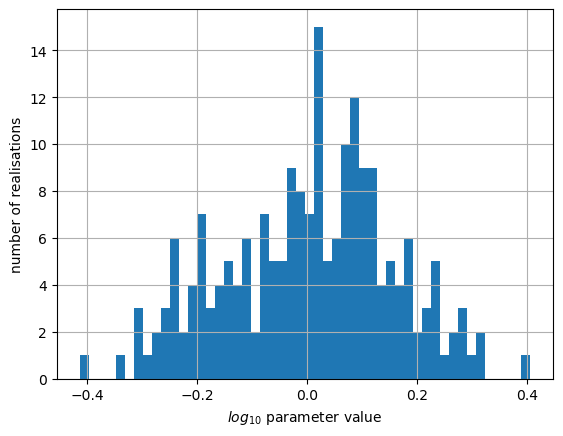

In [111]:
pe.loc[:, 'rch_0'].apply(np.log10).hist(bins=50)       # par.loc["rch_0","partrans"] = LOG, so, ...
plt.xlabel('$log_{10}$ parameter value')
plt.ylabel('number of realisations')
# pe.loc[:, 'rch_0'].hist(bins=100)                    # normal
# plt.xlabel('parameter value')
# plt.ylabel('number of realisations')

In [113]:
par.loc['rch_0', ['parlbnd','parubnd']]

parlbnd    0.5
parubnd    2.0
Name: rch_0, dtype: object

In [114]:
pe.loc[:,"rch_0"].min(),pe.loc[:,"rch_0"].max()

(np.float64(0.3857808566579352), np.float64(2.5465607610049568))

Text(0, 0.5, 'number of realisations')

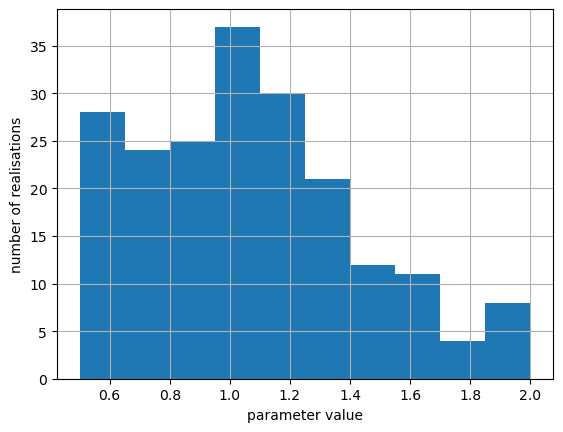

In [115]:
pe.enforce()                           # enforce parmeter bounds.. as a "truncated gaussian distribution"
pe.loc[:, 'rch_0'].hist()
plt.xlabel('parameter value')
plt.ylabel('number of realisations')

In [141]:
# plot_cols = pe.columns[0:8].tolist()            # select column (e.g. parameter) names
# pe.plot(bins=50, 
#         plot_cols=plot_cols,                    # columns to plot
#         filename=None, )                        # __________________external filename to record plot  !!!

In [118]:
# pe.to_csv(os.path.join(f_d, 'prior_pe.csv'))          # record an ensemble to external files 
# pe.to_binary(os.path.join(f_d,'prior_pe.jcb'))

In [119]:
pe = pyemu.ParameterEnsemble.from_csv(pst, filename=os.path.join(f_d, 'prior_pe.csv'))             # read then 
pe_b = pyemu.ParameterEnsemble.from_binary(pst, filename=os.path.join(f_d, 'prior_pe.jcb'))

return type uncaught, losing Ensemble type, returning DataFrame


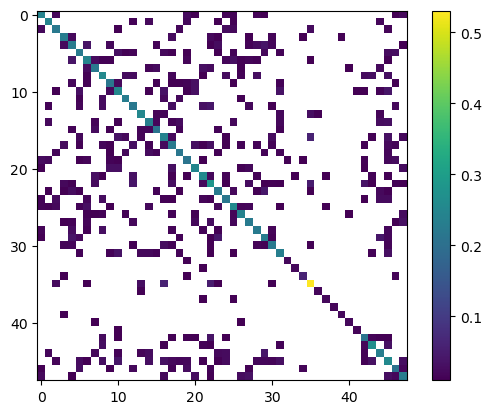

In [121]:
emp_cov = pe.covariance_matrix()       # form an empirical covariance matrix from an ensemble!
x = emp_cov.x.copy()
x[x<1.0e-2] = np.nan
c = plt.imshow(x)
plt.colorbar(c)

# `Bayes  Monte Carlo ` -  linearized posterior parameter distribution

- previously calibrated model and calculated post-calibration Jacobian matrix. 
- Then... post-calibration parameter covariance

The "calibrated" parameter values = mean of the posterior parameter probability distribution. By centering the distribution on values that already provide a good fit with measurment data, we are increasing the likelihood that the realisatiosn that we draw will also fit measured data well. This can be useful in reducing subsequent history-matching computation time.

In [124]:
pe_post = pyemu.ParameterEnsemble.from_gaussian_draw(pst=pst,
                                                    cov=post_cov, 
                                                    num_reals=200)
pe_post.enforce()

drawing from group hk
drawing from group porosity
drawing from group rch
drawing from group sfr
drawing from group w0
drawing from group w1


<Axes: >

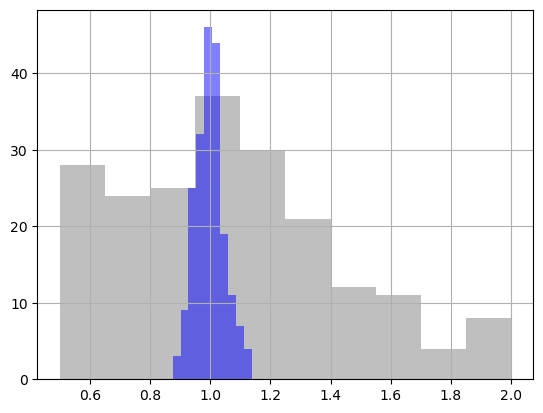

In [133]:
pe.loc[:, 'rch_0'].hist(alpha=0.5,color="0.5")                           # prior 
pe_post.loc[:, 'rch_0'].hist(alpha=0.5,color="b")                        # posterior
# pe_post.loc[:, 'hk00'].plot(kind="hist",bins=20,ax2=ax2,alpha=0.5)     # other Parameter .. ax1,2 err

In [135]:
# pyemu.plot_utils.ensemble_change_summary(pe, pe_post, pst)     # plots the change between two ensembles

In [140]:
# pyemu.plot_utils.ensemble_helper(ensemble={"0.5":pe, "b":pe_post,},
#                                     filename=None,
#                                     plot_cols=plot_cols,)